In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data with DatetimeIndex
yearly_df = pd.read_csv('nity18442004.csv', header=0, parse_dates=False)

# set the frequency of the DatetimeIndex
yearly_df.index = pd.date_range(start='1844', end='2004', freq='YS')
yearly_df.index = yearly_df.index.year
print(yearly_df)

        x
1844  8.5
1845  8.3
1846  9.7
1847  8.9
1848  8.5
...   ...
2000  9.2
2001  8.8
2002  9.5
2003  9.3
2004  9.5

[161 rows x 1 columns]


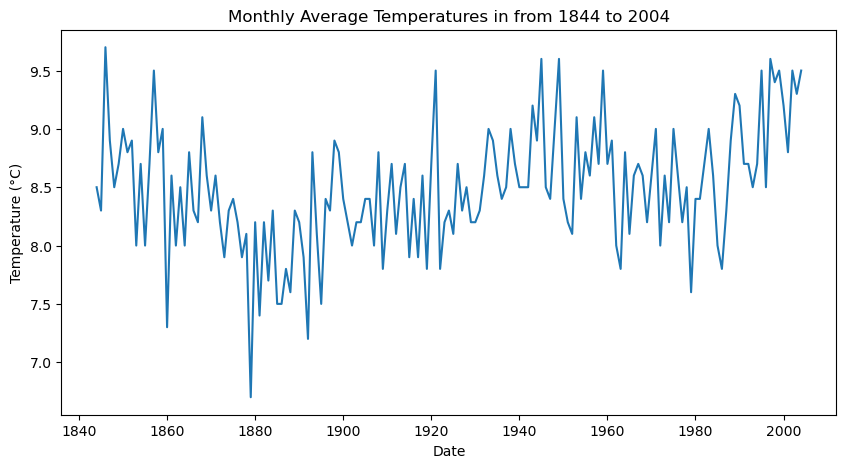

In [3]:
plt.figure(figsize=(10,5))
plt.plot(yearly_df)
plt.title('Monthly Average Temperatures in from 1844 to 2004')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

#Check the stationary

In [4]:
# Determine rolling statistic
rolmean = yearly_df.rolling(window=1).mean()
rolestd = yearly_df.rolling(window=1).std()

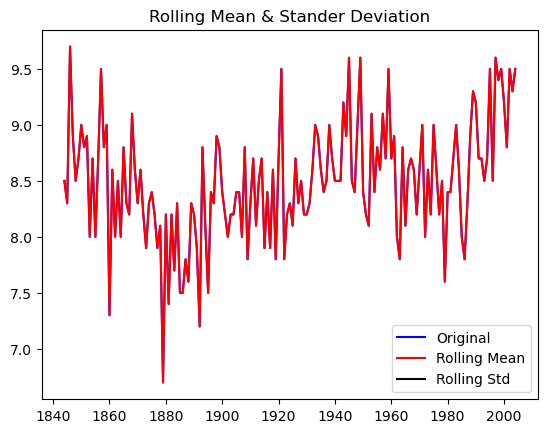

In [5]:
# Plot rolling statistic
orig = plt.plot(yearly_df, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolestd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Stander Deviation')
plt.show(block=False)

In [6]:
#perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey-Fuller Test:")
dftest = adfuller(yearly_df['x'], autolag= 'aic')

dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'P-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
    
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                  -1.352376
P-value                          0.604883
#Lags Used                       6.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


The Dickey-Fuller test confirms this, with this p-value indicating that we can't reject the null hypothesis of non-stationarity.

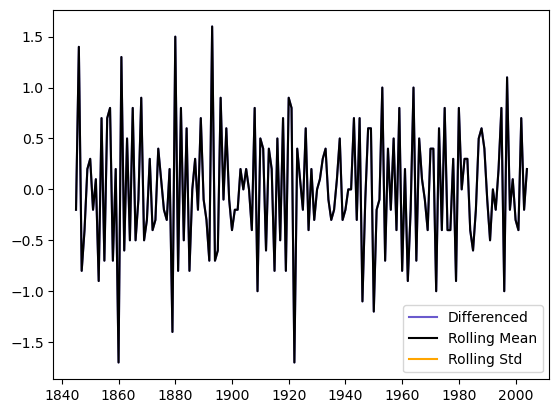

ADF Statistic: -9.704
p-value: 0.000
Critical Values:
   1%: -3.474
   5%: -2.880
   10%: -2.577


In [7]:
# Perform first differencing
diff = yearly_df.diff().dropna()

# Check stationarity
rolmean = diff.rolling(window=1).mean()
rolstd = diff.rolling(window=1).std()

plt.plot(diff, label='Differenced', color = 'slateblue')
plt.plot(rolmean, label='Rolling Mean',color = 'black')
plt.plot(rolstd, label='Rolling Std', color = 'orange')
plt.legend()
plt.show()

result = adfuller(diff['x'], autolag='AIC')
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value:.3f}')

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(diff, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [25]:
diff

,x
1845,-0.2
1846,1.4
1847,-0.8
1848,-0.4
1849,0.2
...,...
2000,-0.3
2001,-0.4
2002,0.7
2003,-0.2


C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


159    0.005031
dtype: float64
Simple Exponential Smoothing MSE: 0.03801273752314862


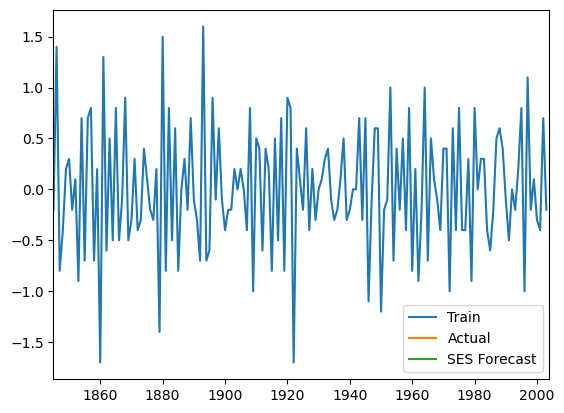

In [33]:
from statsmodels.tsa.api import SimpleExpSmoothing
train = diff.iloc[:len(diff)-1]
test = diff.iloc[len(diff)-1:]

# Fit Simple Exponential Smoothing Model
ses_model = SimpleExpSmoothing(train).fit()

# Make forecasts using the Simple Exponential Smoothing Model
ses_forecast = ses_model.forecast(steps=len(test))
print(ses_forecast)

# Calculate the Mean Squared Error (MSE)
ses_mse = mean_squared_error(test, ses_forecast)

print('Simple Exponential Smoothing MSE:', ses_mse)

# Plot the forecast graph
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(ses_forecast, label='SES Forecast')
plt.legend()
plt.xlim([train.index.min(), test.index.max()])
plt.show()

In [10]:
train

,x
1845,-0.2
1846,1.4
1847,-0.8
1848,-0.4
1849,0.2
...,...
1999,0.1
2000,-0.3
2001,-0.4
2002,0.7


C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Simple Exponential Smoothing RMSE: 0.195
Simple Exponential Smoothing MAE: 0.195
Simple Exponential Smoothing R2: nan


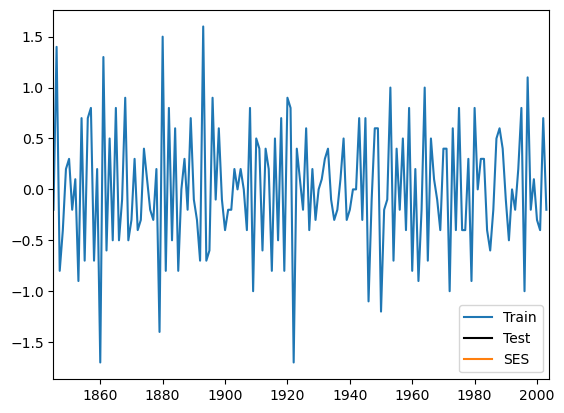

In [12]:
# Fit model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
model = SimpleExpSmoothing(train).fit()

# Make predictions
predictions = model.forecast(len(test))

# Evaluate model
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)
print(f'Simple Exponential Smoothing RMSE: {rmse:.3f}')
print(f'Simple Exponential Smoothing MAE: {mae:.3f}')
print(f'Simple Exponential Smoothing R2: {r2:.3f}')

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color ='black')
plt.plot(predictions.index, predictions, label='SES')
plt.legend()
plt.xlim([train.index.min(), test.index.max()])
plt.show()

### Holt's

C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Holt's Linear Exponential Smoothing RMSE: 0.179
Holt's Linear Exponential Smoothing MAE: 0.179
Holt's Linear Exponential Smoothing R2_Score: nan


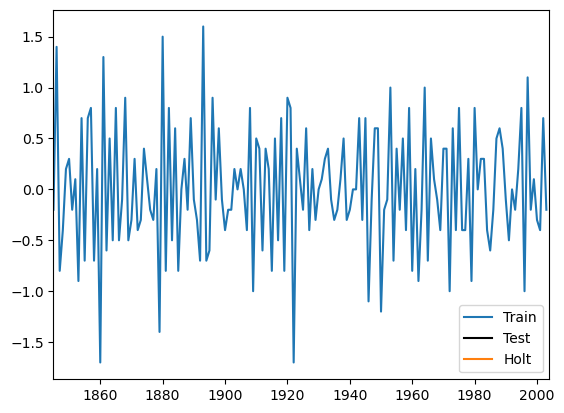

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit model
model = Holt(train).fit()

# Make predictions
predictions = model.forecast(len(test))

# Evaluate model
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)
print(f'Holt\'s Linear Exponential Smoothing RMSE: {rmse:.3f}')
print(f'Holt\'s Linear Exponential Smoothing MAE: {mae:.3f}')
print(f'Holt\'s Linear Exponential Smoothing R2_Score: {r2:.3f}')

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color ='black')
plt.plot(predictions.index, predictions, label='Holt')
plt.legend()
plt.xlim([train.index.min(), test.index.max()])
plt.show()

### Holt-Winters' Seasonal Exponential Smoothing

In [14]:
# Fit model
model = ExponentialSmoothing(train).fit()

# Make predictions
predictions = model.forecast(len(test))

# Evaluate model
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)
print(f'Holt\'s Linear Exponential Smoothing RMSE: {rmse:.3f}')
print(f'Holt\'s Linear Exponential Smoothing MAE: {mae:.3f}')
print(f'Holt\'s Linear Exponential Smoothing R2_Score: {r2:.3f}')

Holt's Linear Exponential Smoothing RMSE: 0.195
Holt's Linear Exponential Smoothing MAE: 0.195
Holt's Linear Exponential Smoothing R2_Score: nan


C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


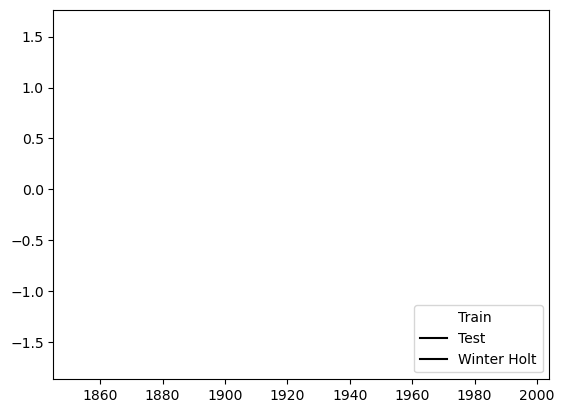

In [20]:
plt.plot(train.index, train, label='Train',color = 'white')
plt.plot(test.index, test, label='Test', color ='black')
plt.plot(predictions.index, predictions, color = 'black',label='Winter Holt')
plt.legend()
plt.xlim([train.index.min(), test.index.max()])
plt.show()

### Arima

C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


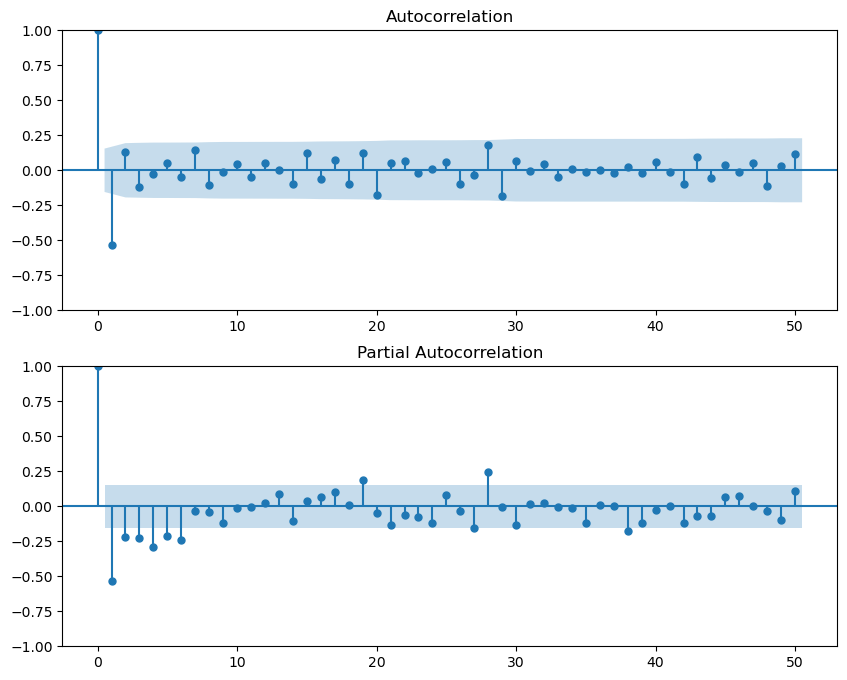

In [16]:
# Plot ACF and PACF of differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff, lags=50, ax=ax[0])
plot_pacf(diff, lags=50, ax=ax[1])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  159
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -103.463
Date:                Wed, 10 May 2023   AIC                            210.926
Time:                        19:40:10   BIC                            217.064
Sample:                             0   HQIC                           213.419
                                - 159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8274      0.052    -15.862      0.000      -0.930      -0.725
sigma2         0.2136      0.021     10.179      0.000       0.172       0.255
Ljung-Box (L1) (Q):                   0.17   Jarque-

C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


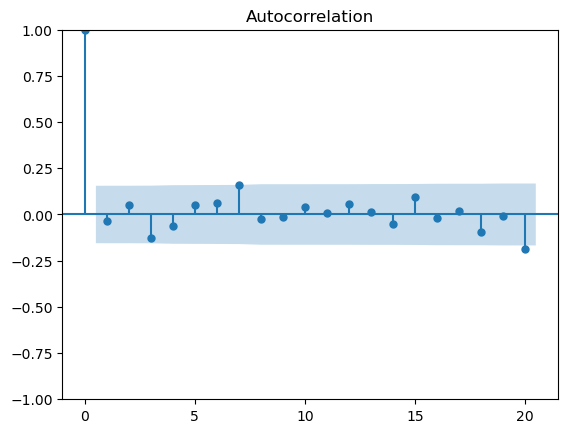

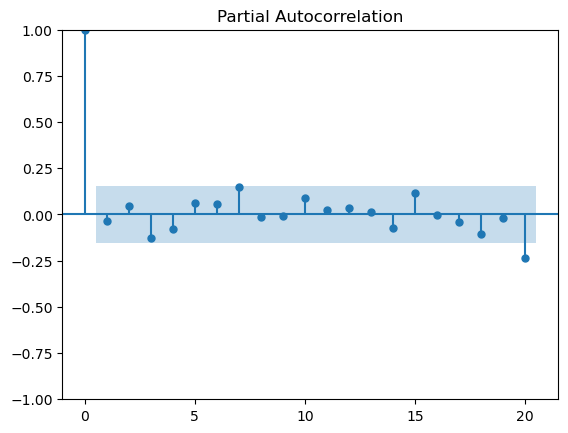

In [32]:
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import acf, pacf, q_stat, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

model = auto_arima(train, seasonal=False, error_action='ignore', suppress_warnings=True)
print(model.summary())

# Plot the ACF and PACF of the residuals
residuals = pd.DataFrame(model.resid(), index=train.index)
plot_acf(residuals, lags=20)
plot_pacf(residuals, lags=20)

# Perform the Ljung-Box test on the residuals
qstat, pval = q_stat(acf(residuals), len(residuals))
print(f'Ljung-Box Q-statistic: {qstat}')
print(f'Ljung-Box p-value: {pval}')

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(0,0,1), seasonal_order=(1,0,1,12)).fit()

# Make predictions
predictions = model.predict(start=test.index[0], end=test.index[-1])

# Evaluate model
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)
print(f'SARIMA RMSE: {rmse:.3f}')
print(f'SARIMA MAE: {mae:.3f}')
print(f'SARIMA R2: {r2:.3f}')

C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 0.200
SARIMA MAE: 0.200
SARIMA R2: nan


C:\Users\Arnab Hati\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Arnab Hati\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
